## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
observ = df.shape[0]
observ


294478

c. The number of unique users in the dataset.

In [4]:
users_unique = df.user_id.nunique()
users_unique


290584

d. The proportion of users converted.

In [5]:
df.query('converted == "1"')['user_id'].count() / observ

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# When treatment group reveives old page or when control group receives new page
df.query('(group == "treatment" & landing_page == "old_page") or \
         (group == "control" & landing_page == "new_page")').shape[0]


3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('(group == "treatment" & landing_page == "new_page") or \
         (group == "control" & landing_page == "old_page")')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'])]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(index=2893, inplace=True)

C:\Users\marie\Anaconda3\envs\data_analysis\lib\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
conver_prob = df2.query('converted == "1"').shape[0] / len(df2)
conver_prob

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df_control = df2.query('group == "control"')
conver_prob_control = len(df_control.query('converted == "1"')) / len(df_control)
conver_prob_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df_treatment = df2.query('group == "treatment"')
conver_prob_treatment = len(df_treatment.query('converted == "1"')) / len(df_treatment)
conver_prob_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
treat_prob = len(df_treatment) / len(df2)
treat_prob

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

The probability of a conversion if the treatment group receives the new landing page is about the same as the probability of the total of all users who participated in the experiment (12%). This makes only sense since we obtained a conversion probability of about 12% for both groups - control and treatment. Our experiment resulted in a fair split of 50% of impressions of the new and old landing page across treatment and control group. In the light of our results, we fail to reject that the new page has an equal or worse conversion performance than the old page. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H_{0}: p_{new} - p_{old} \leq 0 $$
$$H_{1}: p_{new} - p_{old} > 0 $$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
conver_prob

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
conver_prob

0.11959708724499628

c. What is $n_{new}$?

In [20]:
n_new = len(df_treatment)
n_new

145310

d. What is $n_{old}$?

In [21]:
n_old = len(df_control)
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-conver_prob, conver_prob])
new_page_converted

array([0, 0, 0, ..., 1, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-conver_prob, conver_prob])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new-p_old

0.00017672541644132844

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []
for i in range(10000):
    new_page_sample = np.random.choice([0, 1], size=n_new, p=[1-conver_prob, conver_prob])
    old_page_sample = np.random.choice([0, 1], size=n_old, p=[1-conver_prob, conver_prob])
    p_new_sample = new_page_sample.mean()
    p_old_sample = old_page_sample.mean()
    p_diffs.append(p_new_sample-p_old_sample)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

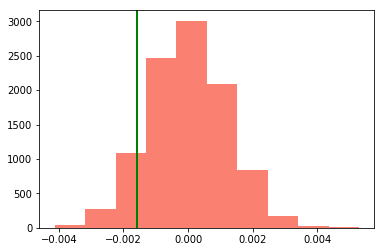

In [26]:
plt.hist(p_diffs, color='salmon')
obs_diff = conver_prob_treatment - conver_prob_control
# plot observed difference
plt.axvline(x=obs_diff, color="g", linewidth=2)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
p_diffs = np.array(p_diffs)
p_val = (p_diffs > obs_diff).mean()
p_val

0.9038

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**

In the previous step, I calculated the p-value by finding the proportion of difference values in the null distribution that were greater than our observed difference. The p-value is used to determine the statistical significance of our observed difference. Our p-value is at 0.9038, which is much higher than our allowed type I error rate of 0.05. Considering our AB test result, we do not have statistical evidence that the new page performs better than the old landing page.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df_control.query('converted == "1"').converted.sum()
convert_new = df_treatment.query('converted == "1"').converted.sum()
n_old = len(df_control)
n_new = len(df_treatment)
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
# One-tailed Z-test for difference of proportions
z_stats, pval = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new], alternative='larger')
print(z_stats, pval)

1.3109241984234394 0.09494168724097551


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**

The Z-score is 1.3 standard deviation above the mean. In a z-test of proportions, we look up the z-score of the α in a one-tailed test. We calculate 100%-5%= 0.95. Looking up the value in the z-score table results in a z-score between 1.64 and 1.65. As our computed z-score of 1.31 is smaller than 1.64, we fail to reject the null hypothesis. Meaning, we fail to reject that the old page performs worse or equal compared to the new page. The same is true when we evaluate the p-value. Since it is a one-sided z-test, we subtract our p-val from the total 1-0.0949. We receive 0.9051, which is similar to the p-value from our simulation (0.903). Since, it is greater that 5%, we fail to reject the null. Hence, both, z-test and the simulation to calculate the statistical significance have the same outcome.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since it is dealing with a binary dependent variable, I am going to perform logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
# add intercept 
df2['intercept'] = 1

# create dummy variables for group/type of page 
df2[['ab_page_control', 'ab_page']] = pd.get_dummies(df2['group'])

# remove one column to make table of full rank
df2 = df2.drop('ab_page_control', axis=1)
df2.head()

C:\Users\marie\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\marie\Anaconda3\envs\data_analysis\lib\site-packages\pandas\core\frame.py:3381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
logm =sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result =logm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 17 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        21:48:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**  

The null hypothesis of our logistic regression model is that there is no relationship between the type of page we show to the user and whether the user converts. The alternative hypothesis is that there is a relationship between the type of page and conversions.  

The model summary states a p-value of 0.19, which is outside of the bounds of our type I error rate of 0.05/2=0.025. In this case, we fail reject the null hypothesis. In other words, we fail to reject that there is no relationship between the type of page and conversion. Although we achieve the same practical result, the p-value from the regression differs from the simulation and z-test. The reason is the difference of our hypotheses. While we focus on the right tail/new landing page in the simulation and z-test, we consider both possible pages in our logistic regression model.  
Since the p-value of our logistic regression is calculated based on both tail ends of our type I error, but our previous hypothesis test considered only the upper side, we cannot compare both p-values directly. We divide 0.19 by 2 (0.095) to make the p-value one sided and subtract it from the right side: 1-0.095=0.905. Now, our p-value is comparable to the p-values from the simulation (0.9038) and z-test (0.9051). As our corrected p-value of 0.905 greater than alpha of 0.05, we fail to reject the null. This aligns with our previous significance tests.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**  

When we run A/B test, we should generally think about the validity of tests in addition to statistical significance. As decision making is complex, we usually expect to improve the model by adding influencing variables to our regression model.  
There are typical A/B test biases that may influence our experiment. People may be more likely to convert because they are curious about the changes (novelty effect) or they may be discouraged by the changes (change aversion). These effects may be evened out by running the experiment long enough, but not too long to get users accustomed to the changes.  

We may also think about other time-related effects on our conversions: e.g. seasons, weekdays/weekends, time of the day, when marketing campaigns are run, societal events. In this sense, analyzing time may improve our regression model. Secondly, we may reduce possible selection bias by tracking user-related data (e.g. account data, acquisition/activation funnels). We want to make sure to get a sample that represents our target population.  

Thirdly, we may add any sales related effects. Discounts and special offers, marketing campaigns, email marketing etc. may drive conversions. Generally speaking, it makes sense to gain a good understanding of the baseline of our website usage to understand whether our landing page really performs better.    

However, we should also be aware about the danger of overfitting our regression model. Adding too many factors may result in invalid outcomes. By considering too many specific variables of our sampling group, we may end up fitting the model well to the characteristics of our sample, but not to the population.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [33]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [34]:
# We receive 3 different countries our landing page was tested in.
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [35]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [36]:
### Create the necessary dummy variables
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
### Fit Your Linear Model And Obtain the Results
# use CA as baseline
logm2 =sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
result2 = logm2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 17 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        21:48:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [38]:
# for interpretation, we need to exponentiate our coeff
np.exp(-1.9893), np.exp(-0.0149), np.exp(-0.0408), np.exp(0.0099)

(0.13679114574153073,
 0.9852104557227469,
 0.9600211149716509,
 1.0099491671175422)

In [39]:
# to improve comprehensiveness, we take the reciprocal of the negative values
1 / np.exp(-1.9893), 1 / np.exp(-0.0149), 1 / np.exp(-0.0408), 

(7.310414680563591, 1.0150115583846535, 1.0416437559600236)

In [40]:
# use US as a baseline
logm3 =sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA']])
result3 = logm3.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 17 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        21:48:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0506      0.028     -1.784      0.074      -0.106       0.005
CA            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

In [41]:
1 / np.exp(-0.0506), 1 / np.exp(-0.0099)

(1.0519020483004984, 1.009949167117542)

<a id='conclusions'></a>
## Conclusions

**Answer:**  

In addition to the type of page we show to the users, we tested the effect of the country of a user on conversions. Our experiment resulted in 3 countries: UK, US and CA. I assume it stands for United Kingdom, USA and Canada. 

Adding the country of users to our regression model didn't have much effect on our ab_page variable(-0.0149 vs. previously -0.0150). According to  our experiment, whether the user comes from the US, UK and CA shows only little differences in conversions. We received a ranking of US, CA, UK with US users being the most likely to convert. If the user was from the USA, they were 1.01 times more likely to convert than if they were from Canada holding all other variables constant. If the user was from Canada, they were 1.04 times more likely to convert than if they were from the UK holding all other variables constant. However, the p-values of our coefficients are all greater than alpha/2=0.025. Hence, we fail to reject that there is no effect of whether the user is from the US, UK or CA on conversions. 




### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.